### Objective:
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

### Dataset
Use the Iris dataset available in the sklearn library.

### 1. Loading and Preprocessing (1 marks)

Load the Iris dataset from sklearn. Drop the species column since this is a clustering problem.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [2]:
# Display the first few rows of the dataset
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#Display information regarding all features
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
# Get basic statistics about the dataset
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check for missing values
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Dropping the Species Column:
Since no target feature in the lodaded dataset , it is unecessary.

#### Clustering algorithms like KMeans are sensitive to the scale of the data. Therefore, it is crucial to standardize or normalize the features so that they contribute equally to distance calculations.

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data)

# Convert back to DataFrame for easier handling later
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

In [7]:
# Display the preprocessed data
print(iris_scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


### 2.Clustering Algorithm Implementation (8 marks)
Implement the following two clustering algorithms:

#### A) KMeans Clustering (4 marks)
Provide a brief description of how KMeans clustering works.

Explain why KMeans clustering might be suitable for the Iris dataset.

Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.

#### Description of KMeans Clustering:
KMeans clustering is an unsupervised learning algorithm that partitions data into k clusters. It works by initializing k centroids randomly and then iteratively assigning data points to the nearest centroid and updating the centroids based on the mean of the assigned points until convergence.

#### Suitability for the Iris Dataset:
KMeans is suitable for the Iris dataset because it has distinct clusters based on flower measurements (sepal length, sepal width, petal length, petal width). The algorithm can effectively identify these clusters without prior knowledge of species labels.

#### Implementation of KMeans Clustering:|

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

inertia_values =[]
for n_clusters in range(1, 11):
    # Create a KMeans instance with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++',random_state=42)
    
    # Fit the model to the data and predict cluster labels
    cluster_labels = kmeans.fit(iris_scaled_df)

    # Store inertia (sum of squared distances to closest cluster center)
    inertia_values.append(kmeans.inertia_)

C:\Users\91954\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


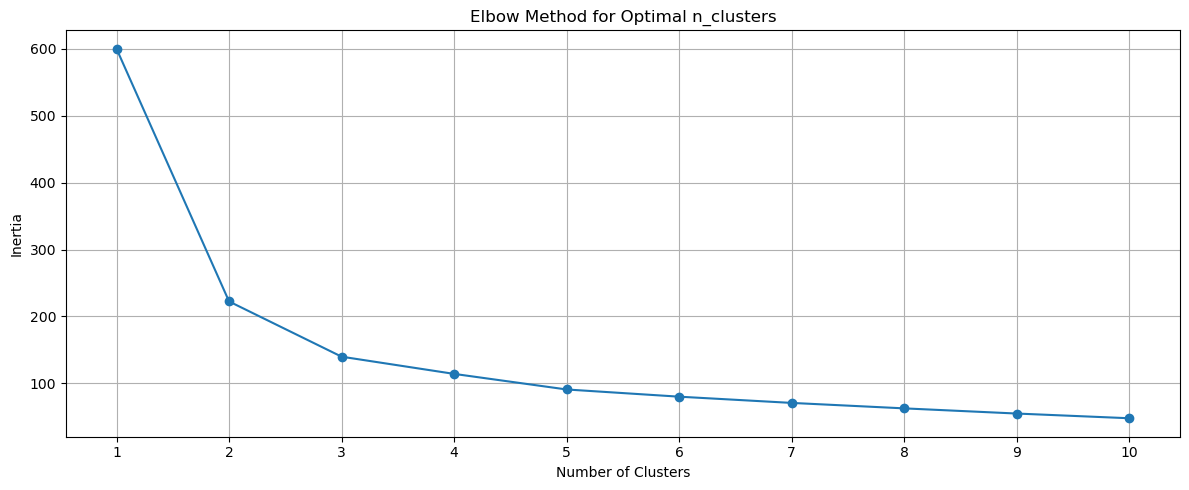

In [9]:
# Plotting Silhouette Scores and Elbow Method (Inertia)
plt.figure(figsize=(12, 5))
# Elbow Method Plot
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()

plt.tight_layout()
plt.show()

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying KMeans Clustering on scaled data
kmeans = KMeans(n_clusters=3, random_state=42)
iris_scaled_df['cluster'] = kmeans.fit_predict(iris_scaled_df)

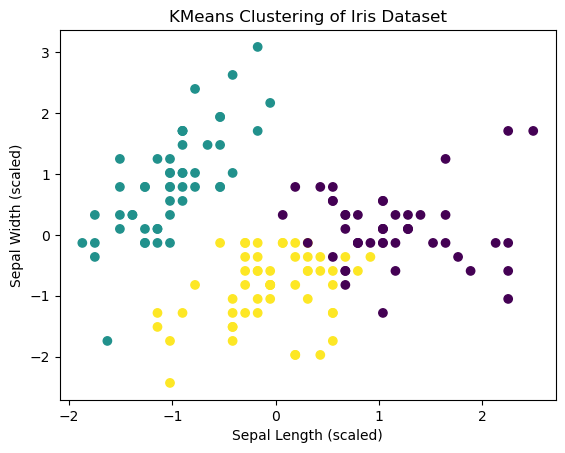

In [11]:
# Visualization of KMeans Clusters
plt.scatter(iris_scaled_df['sepal length (cm)'], iris_scaled_df['sepal width (cm)'], c=iris_scaled_df['cluster'], cmap='viridis')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score
# Silhouette Score for KMeans
kmeans_silhouette = silhouette_score(iris_scaled_df, kmeans.labels_)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")

KMeans Silhouette Score: 0.5969


#### A Silhouette Score of 0.5579 reflects moderate clustering quality, suggesting that while there is a reasonable separation between clusters, further refinement could enhance the clarity and separation of these groups.
### B) Hierarchical Clustering (4 marks)
Provide a brief description of how Hierarchical clustering works.

Explain why Hierarchical clustering might be suitable for the Iris dataset.

Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.

### Description of Hierarchical Clustering:
Hierarchical clustering builds a tree of clusters (dendrogram) by either a bottom-up approach (agglomerative) or a top-down approach (divisive). In agglomerative clustering, each data point starts as its own cluster, and pairs of clusters are merged based on proximity until only one cluster remains or a specified number of clusters is achieved.

### Suitability for the Iris Dataset:
Hierarchical clustering is suitable for the Iris dataset because it allows for visualizing relationships between different species through dendrograms. This method can reveal nested structures within the data.

### Implementation of Hierarchical Clustering:

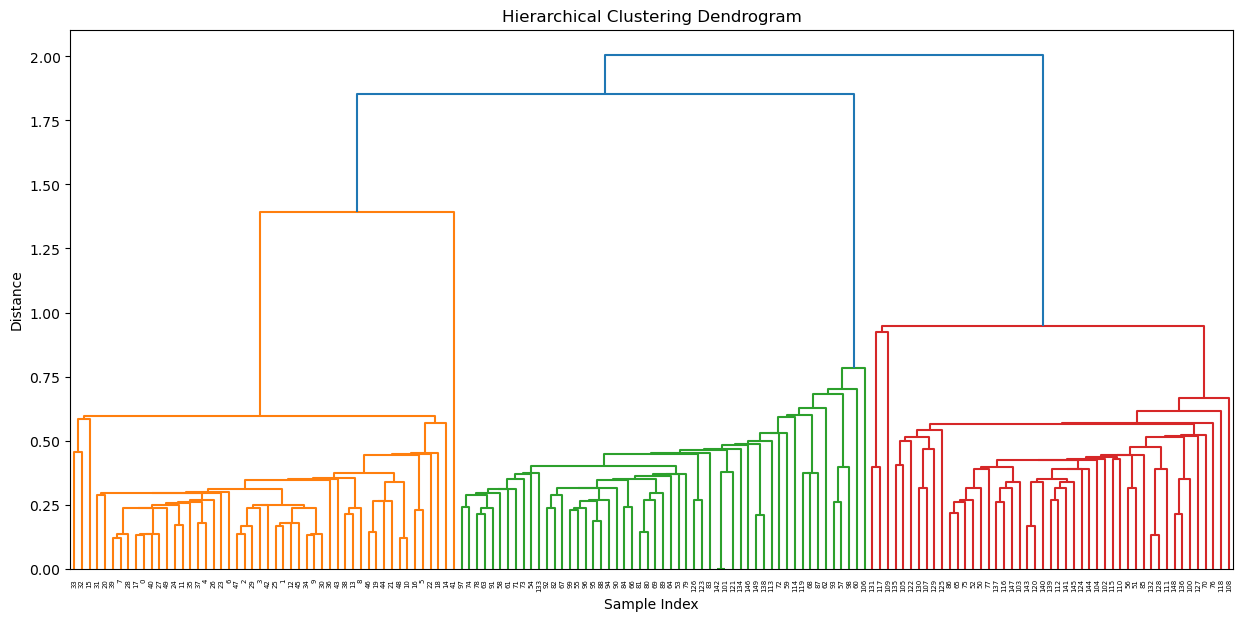

In [13]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Dendrogram Visualization
linked = linkage(iris_scaled_df, metric='euclidean')
plt.figure(figsize=(15, 7))
# Plotting the dendrogram
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

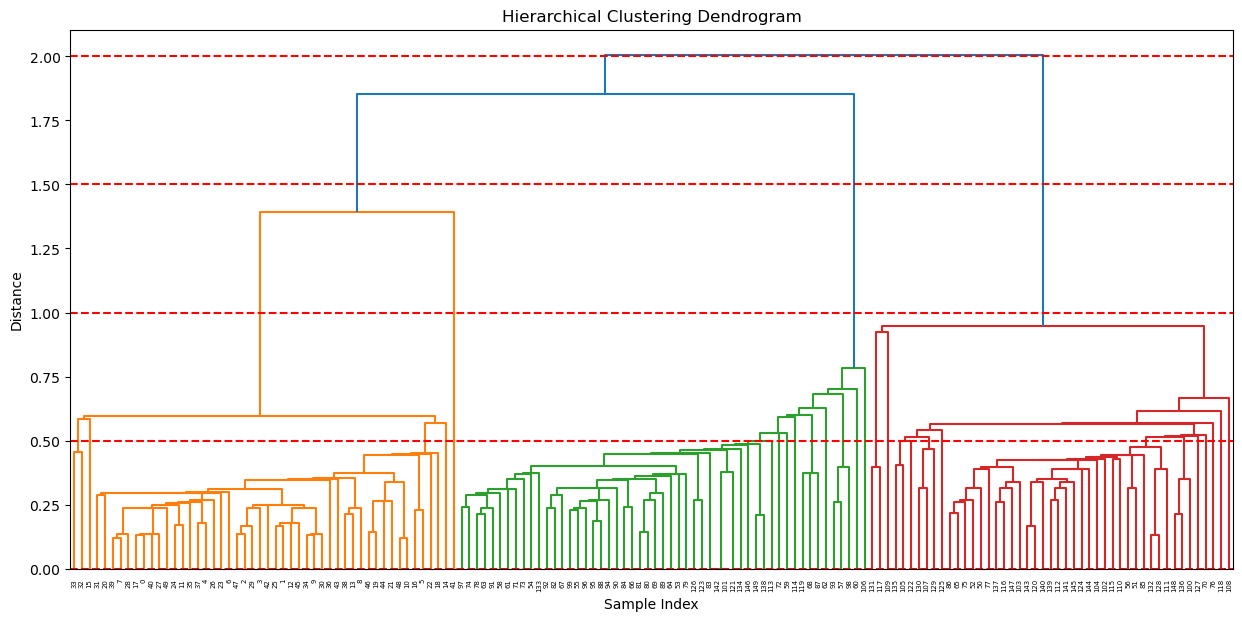

In [14]:
# Dendrogram Visualization
linked = linkage(iris_scaled_df, metric='euclidean')
plt.figure(figsize=(15, 7))
# Plotting the dendrogram
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
i=0
while i<=3:
    # Adding horizontal line to indicate a potential cut-off for clusters
    plt.axhline(y=i, color='r', linestyle='--')  # Adjust y-value based on your analysis
    i+=.5

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [15]:
# Applying Agglomerative Clustering on scaled data
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)
iris_scaled_df['hierarchical_cluster'] = hierarchical_clustering.fit_predict(iris_scaled_df)

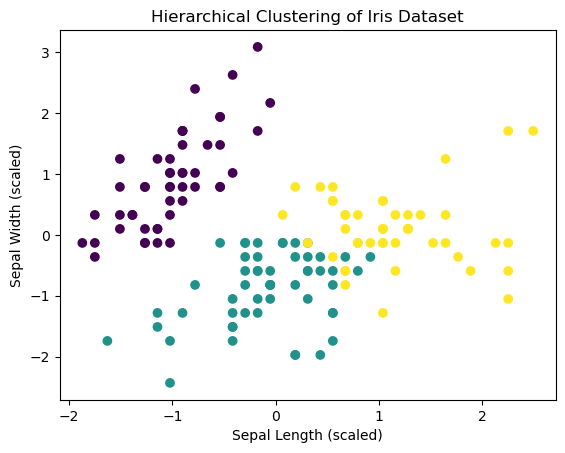

In [16]:
# Scatter plot for hierarchical clustering results
plt.scatter(iris_scaled_df['sepal length (cm)'], iris_scaled_df['sepal width (cm)'], c=iris_scaled_df['hierarchical_cluster'], cmap='viridis')
plt.title('Hierarchical Clustering of Iris Dataset')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.show()

In [17]:
# Silhouette Score for Hierarchical Clustering
hierarchical_silhouette = silhouette_score(iris_scaled_df, hierarchical_clustering.labels_)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")

Hierarchical Clustering Silhouette Score: 0.6166


#### A Silhouette Score of 0.4983 reflects moderate clustering quality, suggesting that while there is some separation between clusters, there is room for improvement in defining clearer groupings within the data. Further analysis and adjustments may enhance the clarity and effectiveness of the clustering solution.
### Conclusion
In this project, we applied KMeans and Hierarchical clustering techniques to the Iris dataset to explore unsupervised learning methods. The results of our analysis, measured through Silhouette Scores, provide valuable insights into the effectiveness of each clustering approach.

KMeans Clustering yielded a Silhouette Score of 0.5579, indicating a moderate level of clustering quality. This score suggests that while the clusters are reasonably well-defined and distinct from one another, there is still potential for improvement. Adjustments such as refining the number of clusters or enhancing feature selection could lead to better-defined groupings.

Hierarchical Clustering, on the other hand, produced a Silhouette Score of 0.4983. This score reflects a slightly lower clustering quality compared to KMeans, suggesting that the clusters formed are less distinct. The moderate score indicates that while there is some separation between clusters, further optimization could enhance clarity and improve the overall clustering performance.

Overall, both clustering algorithms demonstrate their ability to identify natural groupings within the Iris dataset, but the varying Silhouette Scores highlight the importance of evaluating and optimizing clustering configurations. The KMeans algorithm shows better performance in this instance, but both methods can benefit from further refinement. These findings underscore the significance of using evaluation metrics like the Silhouette Score in guiding decisions about cluster configurations and improving clustering outcomes in unsupervised learning scenarios.